In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/US_Accidents_March23.csv"
df = pd.read_csv(file_path)

print(f"Total rows: {df.shape[0]}")

KeyboardInterrupt: 

In [ ]:
chunks = []
for chunk in pd.read_csv(file_path, chunksize=500000):
    # Process each chunk as needed
    # For example, you can perform data manipulation, analysis, etc.

    # Append the chunk to the list
    chunks.append(chunk)
    break

# Concatenate the chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

In [ ]:
chunk_size = 10000  # You can adjust this based on your memory constraints

# Initialize an empty list to store the chunks
chunks = []

# Number of rows to sample from each chunk
sample_size = 100  # Adjust this as needed

# Iterate over the file in chunks
for chunk in pd.read_csv(file_path, chunksize=chunk_size):
    # Take a random sample of rows from the current chunk
    random_sample = chunk.sample(n=sample_size)

    # Append the random sample to the list
    chunks.append(random_sample)

    # Stop reading chunks after 500,000 rows have been sampled
    if len(pd.concat(chunks)) >= 500000:
        break

# Concatenate the sampled chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)


KeyboardInterrupt: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            500000 non-null  object 
 11  Street                 500000 non-null  object 
 12  City                   499978 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

Crashes by Year

In [ ]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year part
df['Year'] = df['Start_Time'].dt.year

# Count occurrences of crashes each year
yearly_crash_counts = df['Year'].value_counts().sort_values(ascending=False)

# Display the yearly crash counts
print(yearly_crash_counts)

Year
2016    281261
2017    218739
Name: count, dtype: int64


Temp ranges during accidents by year

In [ ]:


# Extract year from Start_Time
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Define temperature bins
bin_edges = np.arange(df['Temperature(F)'].min(), df['Temperature(F)'].max() + 5, 5)

# Categorize the data into bins
df['Temp_Range'] = pd.cut(df['Temperature(F)'], bins=bin_edges)

# Group by year and temperature range
grouped_data = df.groupby(['Year', 'Temp_Range'])

# Count occurrences in each group
temp_range_counts = grouped_data.size().reset_index(name='Accident_Count')

# Sort by year and temperature range
temp_range_counts_sorted = temp_range_counts.sort_values(['Year', 'Accident_Count'], ascending=[True, False])

# Print the top temperature ranges by year
for year, group in temp_range_counts_sorted.groupby('Year'):
    print(f"Year: {year}")
    print(group.head(10))  # Print top 10 temperature ranges for each year
    print()



Year: 2016
    Year    Temp_Range  Accident_Count
30  2016  (72.2, 77.2]           36080
28  2016  (62.2, 67.2]           34663
29  2016  (67.2, 72.2]           34566
31  2016  (77.2, 82.2]           29780
27  2016  (57.2, 62.2]           26022
32  2016  (82.2, 87.2]           25384
26  2016  (52.2, 57.2]           20474
33  2016  (87.2, 92.2]           16291
25  2016  (47.2, 52.2]           13905
24  2016  (42.2, 47.2]            9374

Year: 2017
    Year    Temp_Range  Accident_Count
76  2017  (62.2, 67.2]           24486
75  2017  (57.2, 62.2]           23991
77  2017  (67.2, 72.2]           23774
74  2017  (52.2, 57.2]           23416
78  2017  (72.2, 77.2]           23018
73  2017  (47.2, 52.2]           16170
79  2017  (77.2, 82.2]           15930
72  2017  (42.2, 47.2]           11971
80  2017  (82.2, 87.2]           11845
71  2017  (37.2, 42.2]            9650



<ipython-input-62-58e63896307d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_counts_top_15['Temp_Range'] = temp_counts_top_15['Temp_Range'].astype(str)


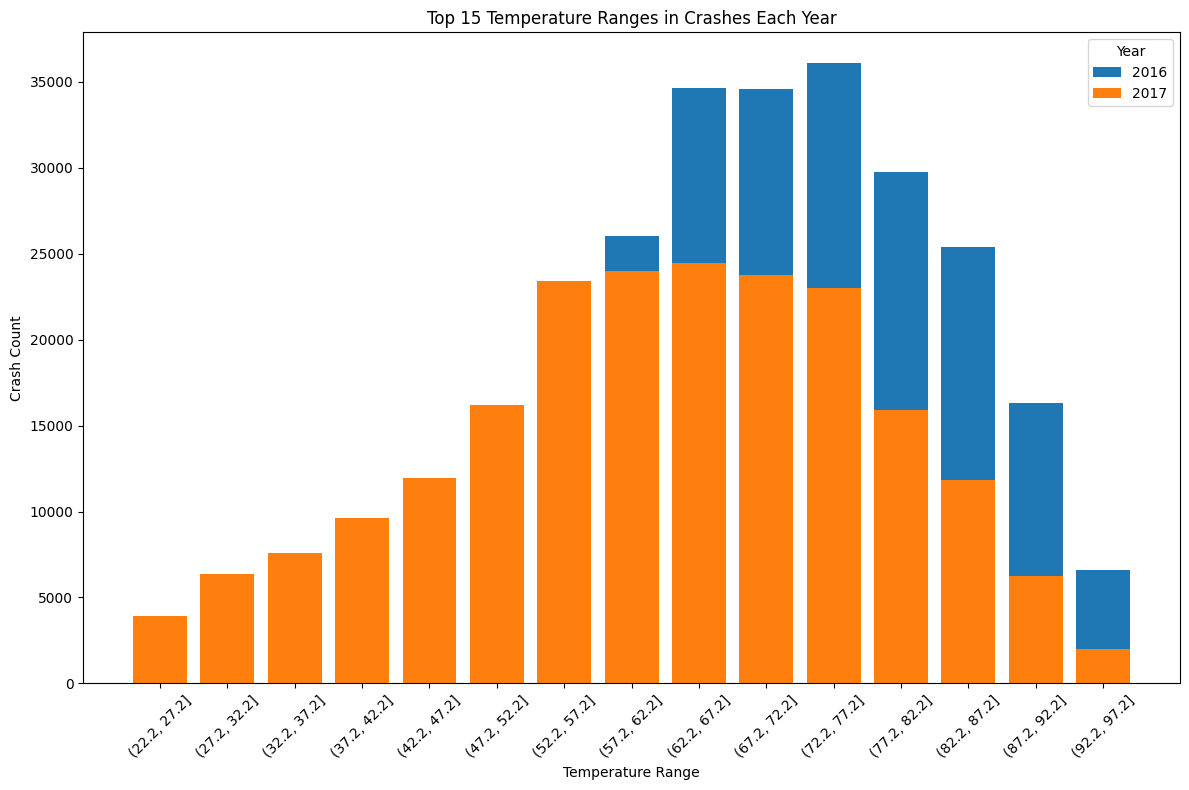

In [ ]:
# Group the data by year and temperature range
grouped_data_temp = df.groupby(['Year', 'Temp_Range'])

# Count occurrences in each group
temp_counts = grouped_data_temp.size().reset_index(name='Crash_Count')

# Get the top 15 temperature ranges
top_15_ranges = temp_counts.groupby('Temp_Range')['Crash_Count'].sum().nlargest(15).index

# Filter temp_counts to include only the top 15 ranges
temp_counts_top_15 = temp_counts[temp_counts['Temp_Range'].isin(top_15_ranges)]

# Convert Temp_Range intervals to strings
temp_counts_top_15['Temp_Range'] = temp_counts_top_15['Temp_Range'].astype(str)

# Plot the top 15 temperature ranges in crashes each year
plt.figure(figsize=(12, 8))
for year, group in temp_counts_top_15.groupby('Year'):
    plt.bar(group['Temp_Range'], group['Crash_Count'], label=year)

plt.title('Top 15 Temperature Ranges in Crashes Each Year')
plt.xlabel('Temperature Range')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
bin_edges = np.arange(df['Temperature(F)'].min(), df['Temperature(F)'].max() + 5, 5)

# Categorize the data into bins
df['Temp_Range'] = pd.cut(df['Temperature(F)'], bins=bin_edges)

# Count occurrences in each bin
temp_range_counts = df['Temp_Range'].value_counts()

# Sort by most common and get the top 10
top_10_temp_ranges = temp_range_counts.head(20)
print(top_10_temp_ranges)

Temp_Range
(62.2, 67.2]     59149
(72.2, 77.2]     59098
(67.2, 72.2]     58340
(57.2, 62.2]     50013
(77.2, 82.2]     45710
(52.2, 57.2]     43890
(82.2, 87.2]     37229
(47.2, 52.2]     30075
(87.2, 92.2]     22540
(42.2, 47.2]     21345
(37.2, 42.2]     17262
(32.2, 37.2]     13532
(27.2, 32.2]     10050
(92.2, 97.2]      8615
(22.2, 27.2]      6114
(17.2, 22.2]      3786
(97.2, 102.2]     2084
(12.2, 17.2]      1814
(7.2, 12.2]       1004
(2.2, 7.2]         457
Name: count, dtype: int64


Weather conditions during crashes by Year

In [ ]:
# Group by year and weather condition
grouped_data = df.groupby(['Year', 'Weather_Condition'])

# Count occurrences in each group
weather_condition_counts = grouped_data.size().reset_index(name='Crashes_Count')

# Print the top weather conditions by year
for year, group in weather_condition_counts.groupby('Year'):
    print(f"Year: {year}")
    print(group.sort_values('Crashes_Count', ascending=False).head(10))  # Print top 10 weather conditions for each year
    print()

Year: 2016
    Year Weather_Condition  Crashes_Count
3   2016             Clear         124284
36  2016          Overcast          38833
33  2016     Mostly Cloudy          35260
37  2016     Partly Cloudy          28195
43  2016  Scattered Clouds          26675
25  2016        Light Rain           9349
12  2016              Haze           3504
40  2016              Rain           1862
7   2016              Fair           1631
29  2016        Light Snow           1293

Year: 2017
     Year Weather_Condition  Crashes_Count
57   2017             Clear          80745
96   2017          Overcast          40198
93   2017     Mostly Cloudy          30905
102  2017  Scattered Clouds          19039
97   2017     Partly Cloudy          18713
84   2017        Light Rain          11151
88   2017        Light Snow           2669
99   2017              Rain           2386
65   2017              Haze           2380
61   2017              Fair            825



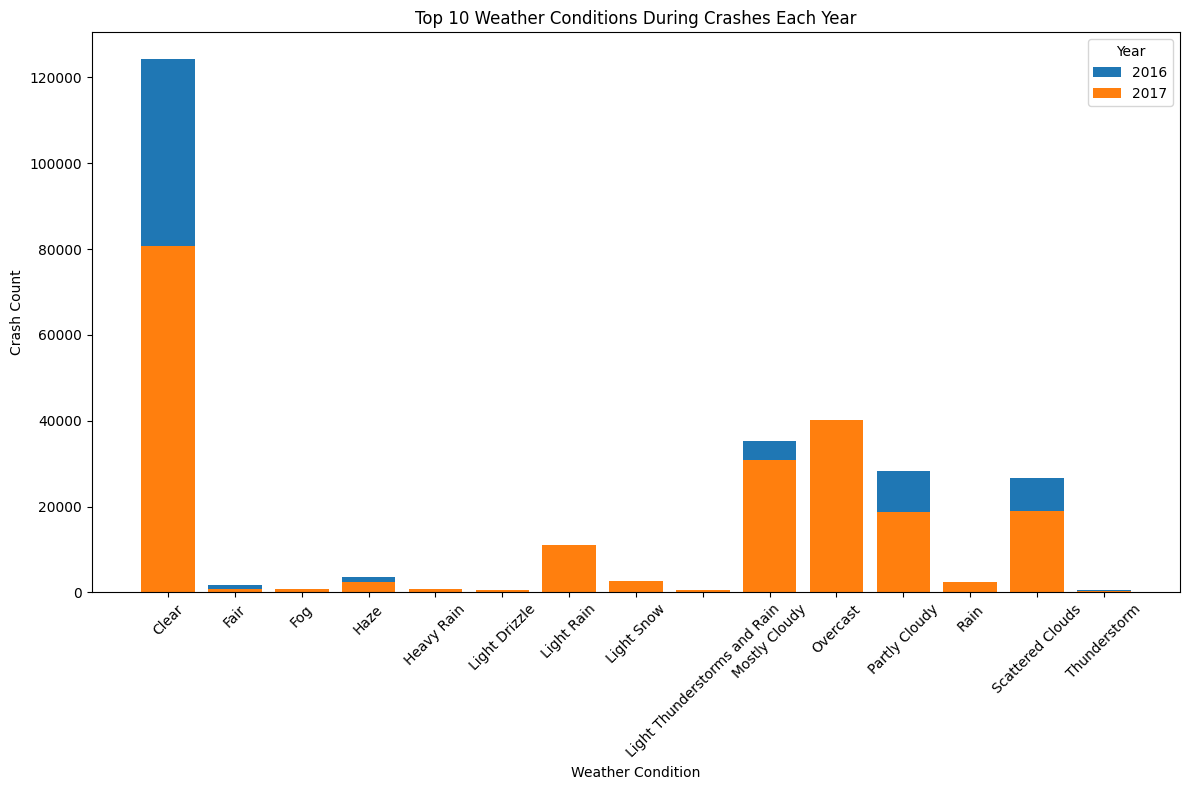

In [ ]:
# Group the data by year and weather condition
grouped_data_weather = df.groupby(['Year', 'Weather_Condition'])

# Count occurrences in each group
weather_counts = grouped_data_weather.size().reset_index(name='Crash_Count')

# Get the top 10 weather conditions
top_10_conditions = weather_counts.groupby('Weather_Condition')['Crash_Count'].sum().nlargest(15).index

# Filter weather_counts to include only the top 10 conditions
weather_counts_top_10 = weather_counts[weather_counts['Weather_Condition'].isin(top_10_conditions)]

# Plot the top 10 weather conditions during crashes each year
plt.figure(figsize=(12, 8))
for year, group in weather_counts_top_10.groupby('Year'):
    plt.bar(group['Weather_Condition'], group['Crash_Count'], label=year)

plt.title('Top 10 Weather Conditions During Crashes Each Year')
plt.xlabel('Weather Condition')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

States ranked by crashes in each Year

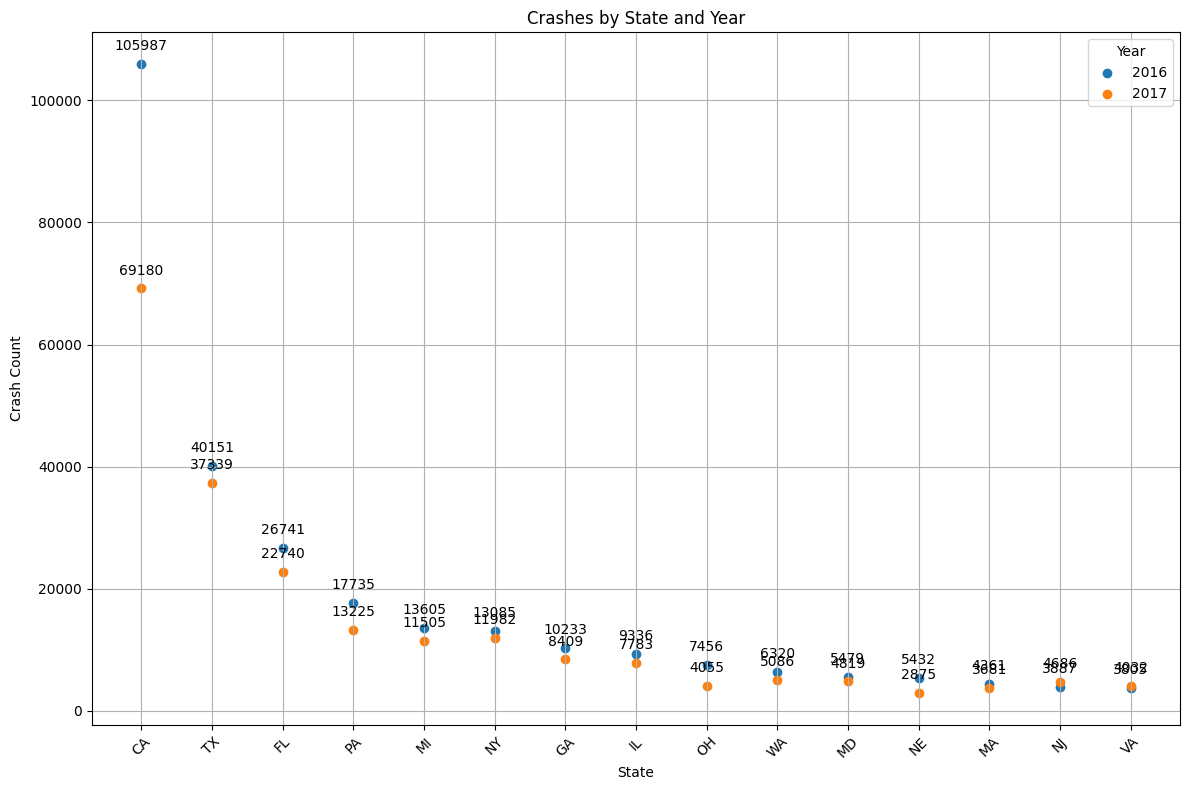

In [ ]:
grouped_data = df.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')
# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Crashes by State and Year')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

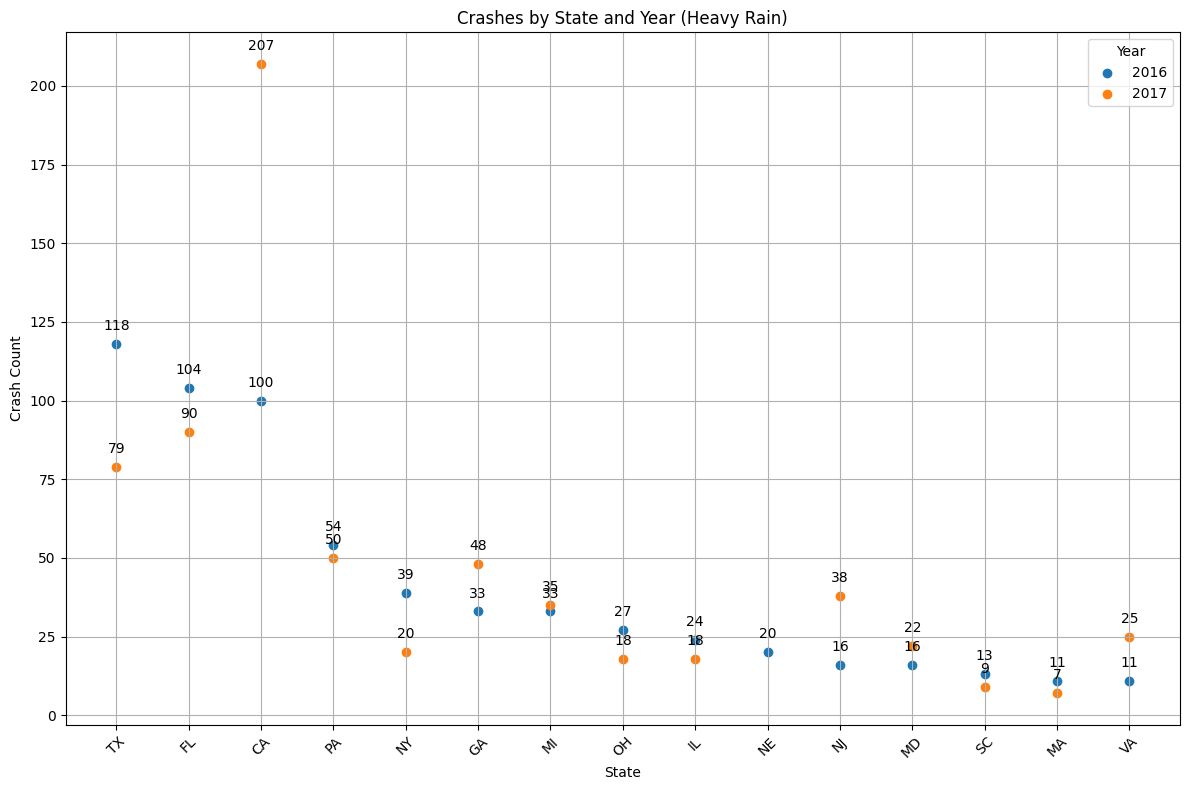

In [ ]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Heavy Rain']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

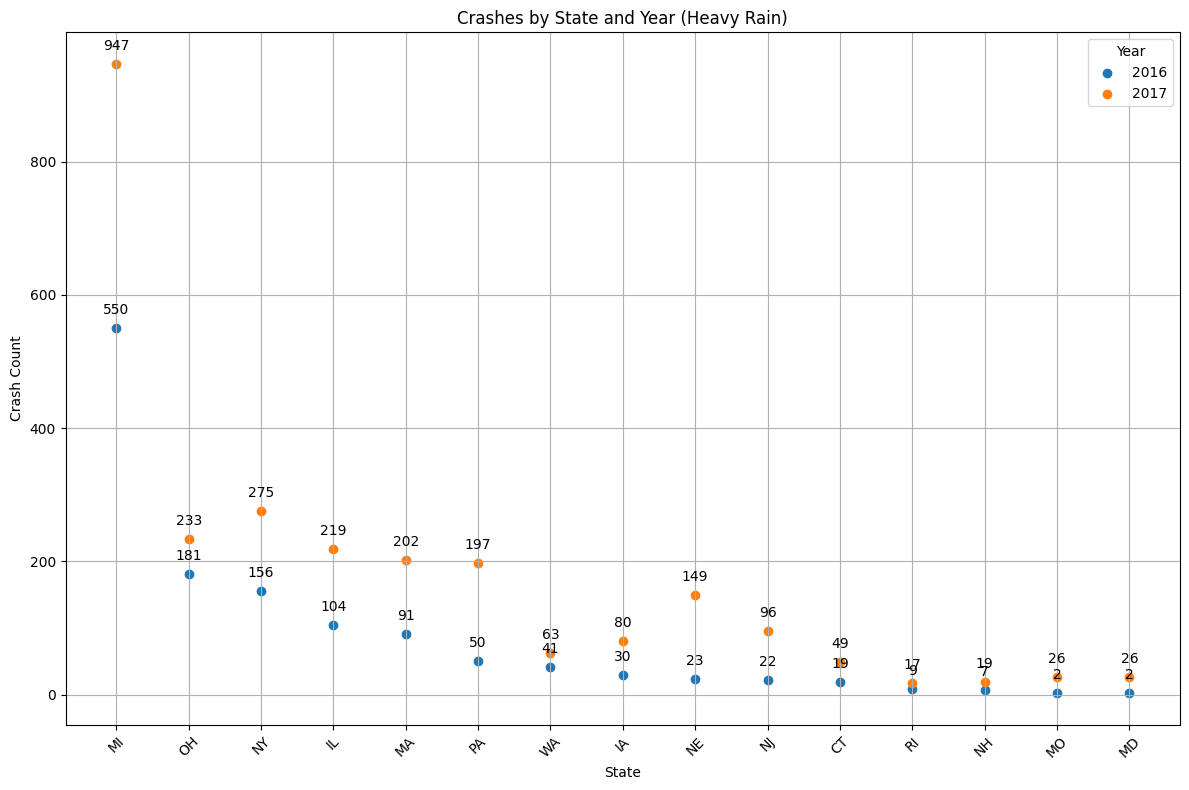

In [ ]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Light Snow']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

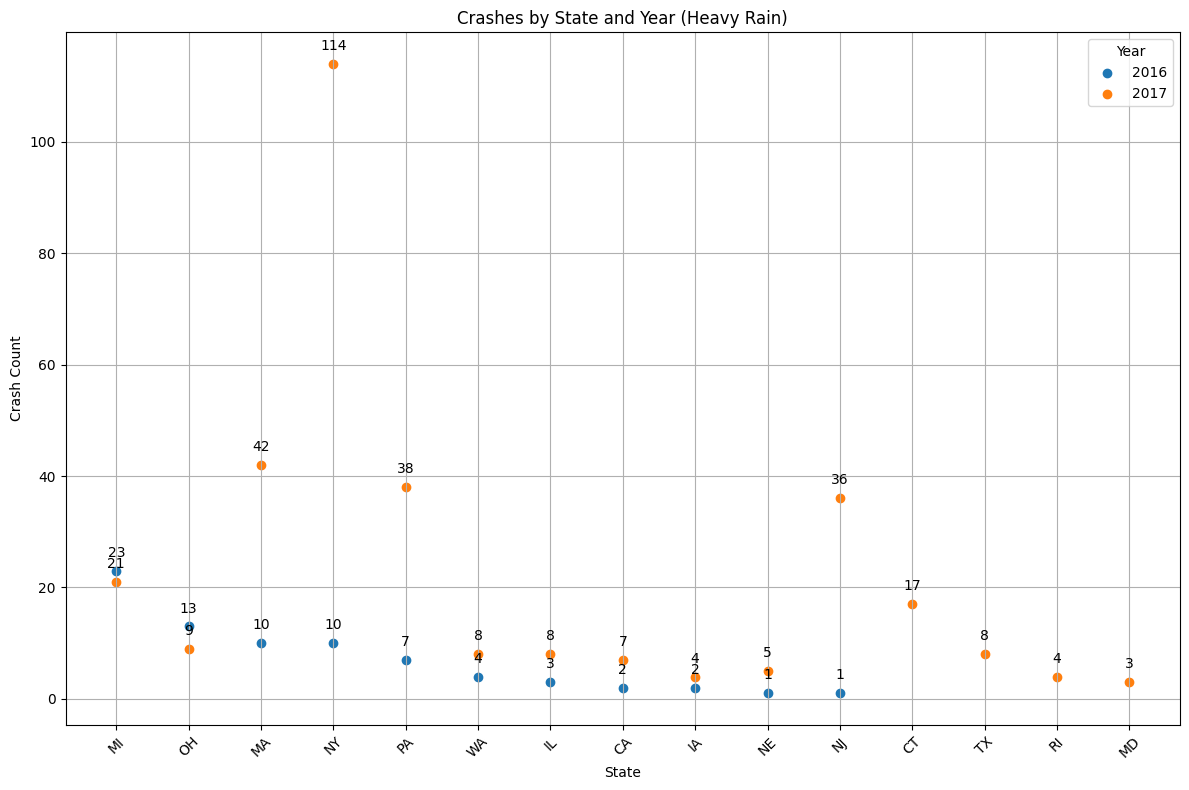

In [ ]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Snow']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

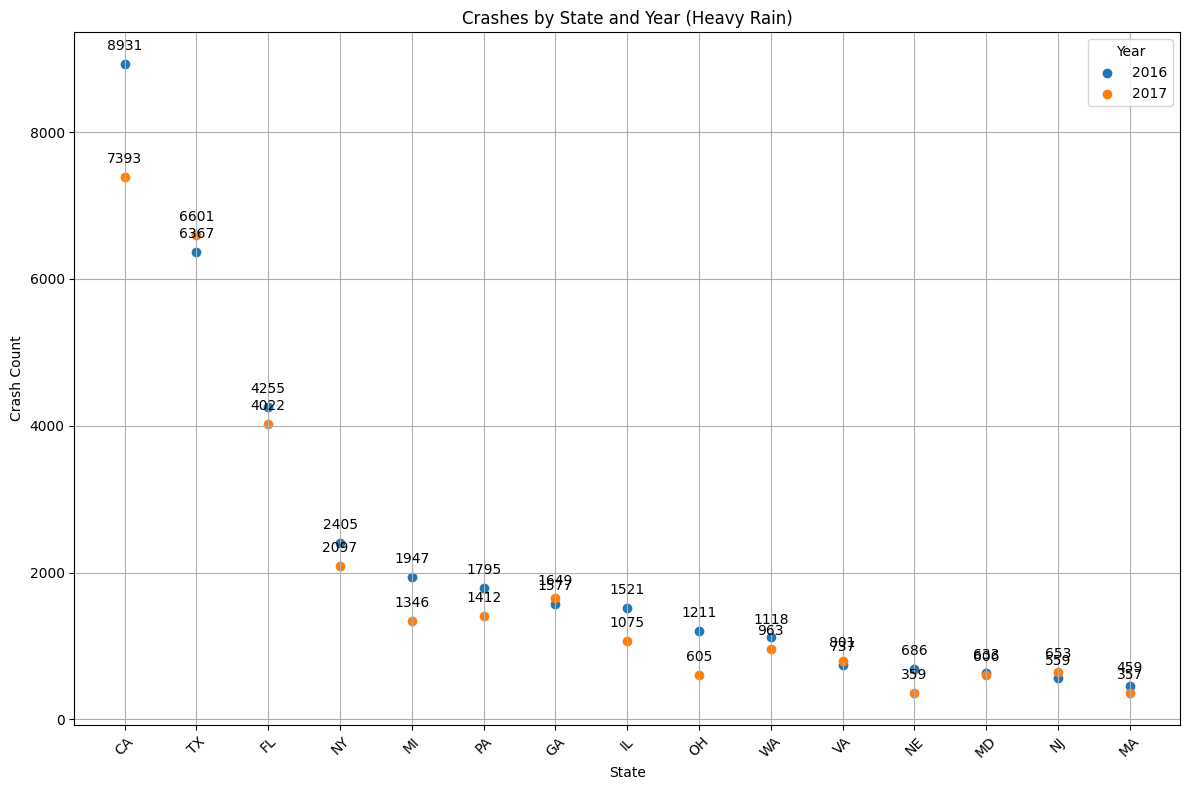

In [ ]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Mostly Cloudy']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
co_df = df[df['State'] == 'CA']


In [ ]:
# Group data by year and geographical coordinates (latitude and longitude)
grouped_data = co_df.groupby(['Year', 'Start_Lat', 'Start_Lng'])

# Count the number of accidents for each group
accident_counts = grouped_data.size().reset_index(name='Accident_Count')

# Find the accident hotspots in CO for each year
hotspots_by_year = {}
for year, group in accident_counts.groupby('Year'):
    hotspot_year = group.sort_values(by='Accident_Count', ascending=False).head(10)
    hotspots_by_year[year] = hotspot_year

# Print accident hotspots in CO for each year
for year, hotspots in hotspots_by_year.items():
    print(f"Accident Hotspots in Colorado for Year {year}:")
    print(hotspots)
    print()

Accident Hotspots in Colorado for Year 2016:
       Year  Start_Lat   Start_Lng  Accident_Count
12138  2016  33.941364 -118.096634             168
14643  2016  34.010056 -117.823219             158
33920  2016  37.808498 -122.366852             143
9258   2016  33.876289 -118.102577             134
18401  2016  34.064995 -118.000229             125
13940  2016  33.993450 -118.069351             122
14081  2016  33.997040 -117.931015             120
12428  2016  33.949665 -118.091896             114
17866  2016  34.055695 -118.451965             108
15166  2016  34.019634 -117.988121             104

Accident Hotspots in Colorado for Year 2017:
       Year  Start_Lat   Start_Lng  Accident_Count
67348  2017  37.808498 -122.366852             120
50112  2017  33.876289 -118.102577              95
52091  2017  33.941364 -118.096634              93
55229  2017  34.038456 -118.274010              84
55749  2017  34.055695 -118.451965              75
52286  2017  33.949665 -118.091896        

In [ ]:
grouped_weather = co_df.groupby(['Year', 'Description'])

# Count occurrences of each weather condition in each year
weather_counts_by_year = grouped_weather.size().reset_index(name='Weather_Count')

# Get the top 10 weather conditions for each year in Colorado
top_10_weather_conditions_by_year = weather_counts_by_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Weather_Count')).reset_index(drop=True)

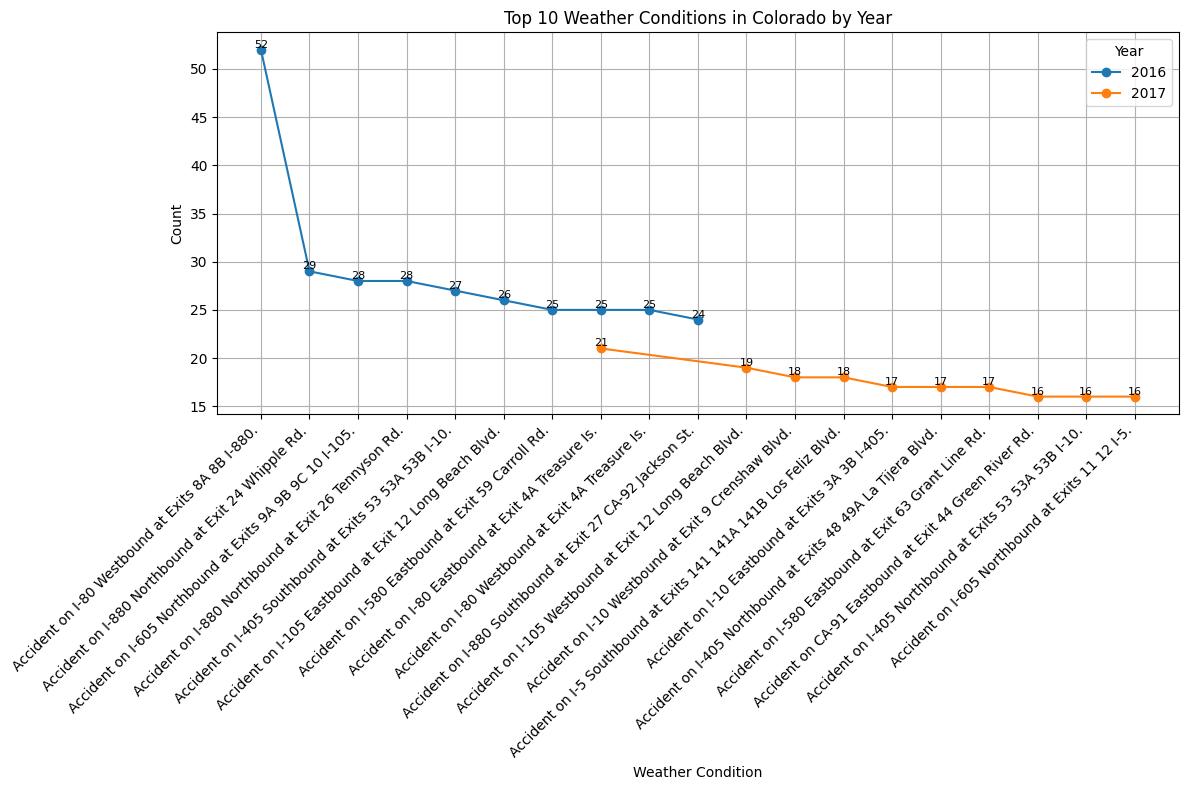

In [ ]:
# Group data by year and geographical coordinates (latitude and longitude)
# Group data by year and weather condition
grouped_weather = co_df.groupby(['Year', 'Description'])

# Count occurrences of each weather condition in each year
weather_counts_by_year = grouped_weather.size().reset_index(name='Weather_Count')

# Get the top 10 weather conditions for each year in Colorado
top_10_weather_conditions_by_year = weather_counts_by_year.groupby('Year').apply(lambda x: x.nlargest(10, 'Weather_Count')).reset_index(drop=True)

plt.figure(figsize=(12, 8))
for year, data in top_10_weather_conditions_by_year.groupby('Year'):
    plt.plot(data['Description'], data['Weather_Count'], marker='o', label=year)
    for index, row in data.iterrows():
        plt.text(row['Description'], row['Weather_Count'], row['Weather_Count'], fontsize=8, ha='center', va='bottom')

plt.title('Top 10 Weather Conditions in Colorado by Year')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()